# Edited by Ashen; 微信公众号:爱研思谈; Github:AshenOneme

### 在OpenSeespy中快捷添加常用截面(任意四边形、圆形、环形、工字形。。。)进行分析

In [1]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
from pylab import *
import os

### 材料信息

In [2]:
ops.wipe() # 初始清空
ops.model('basic', '-ndm', 2, '-ndf', 3)  # frame 2D
IDSteel = 1
Fy_Steel = 400
E0_Steel = 206000
bs_Steel = 0.005
R0 = 12.5
cR1 = 0.925
cR2 = 0.15
ops.uniaxialMaterial('Steel02', IDSteel, Fy_Steel, E0_Steel, bs_Steel,R0,cR1,cR2)

IDCoverC=2
fpc_cover=-40
epsc0_cover=-0.002
fpcu_cover=-8
epsU_cover=-0.004
ops.uniaxialMaterial('Concrete01', IDCoverC, fpc_cover, epsc0_cover, fpcu_cover, epsU_cover)

IDCoreC=3
fpc_core=-40
epsc0_core=-0.0024
fpcu_core=-18
epsU_core=-0.006
ops.uniaxialMaterial('Concrete01', IDCoreC, fpc_core, epsc0_core, fpcu_core, epsU_core)

### 矩形截面
### ops.patch('rect', 材料编号, Y向纤维数量, Z向纤维数量, 起点Y坐标, 起点Z坐标, 终点Y坐标, 终点Z坐标)
### 一般来说矩形梁柱截面划分为五个部分，其中核心混凝土为一个部分，保护层切为4个部分

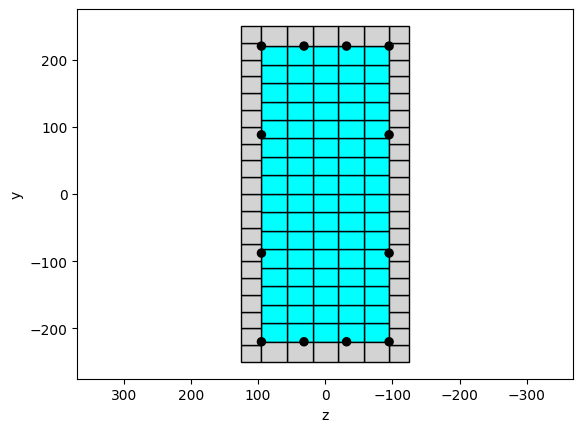

In [3]:
Bbeam = 250
Hbeam = 500
c=30
y1beam = Hbeam/2.0
z1beam = Bbeam/2.0
y2beam = (Hbeam-2*c)/5.0
nFibZ=1
nFibZ_Core = 5
nFib=20
nFibCover, nFibY_Core = 1, 16
As_bar = 3.14*6*6
fiber_beam_section=2
ops.section('Fiber', fiber_beam_section)
ops.patch('rect', IDCoreC, nFibY_Core, nFibZ_Core, c-y1beam, c-z1beam, y1beam-c, z1beam-c)
ops.patch('rect', IDCoverC, nFib, nFibZ, -y1beam, -z1beam, y1beam, c-z1beam)
ops.patch('rect', IDCoverC, nFib, nFibZ, -y1beam, z1beam-c, y1beam, z1beam)
ops.patch('rect', IDCoverC, nFibCover, nFibZ_Core, -y1beam, c-z1beam, c-y1beam, z1beam-c)
ops.patch('rect', IDCoverC, nFibCover, nFibZ_Core, y1beam-c, c-z1beam, y1beam, z1beam-c)
ops.layer('straight', IDSteel, 2, As_bar, y1beam - c, z1beam - c, y1beam - c, c - z1beam)
ops.layer('straight', IDSteel, 2, As_bar, y2beam, z1beam - c, y2beam, c - z1beam)
ops.layer('straight', IDSteel, 2, As_bar, -y2beam, z1beam - c, -y2beam, c - z1beam)
ops.layer('straight', IDSteel, 2, As_bar, c - y1beam, z1beam - c, c - y1beam, c - z1beam)

fiber_beam_section2=[['section', 'Fiber', 2],
                     ['patch', 'rect', IDCoreC, nFibY_Core, nFibZ_Core, c-y1beam, c-z1beam, y1beam-c, z1beam-c],
                     ['patch', 'rect', IDCoverC, nFib, nFibZ, -y1beam, -z1beam, y1beam, c-z1beam],
                     ['patch', 'rect', IDCoverC, nFib, nFibZ, -y1beam, z1beam-c, y1beam, z1beam],
                     ['patch', 'rect', IDCoverC, nFibCover, nFibZ_Core, -y1beam, c-z1beam, c-y1beam, z1beam-c],
                     ['patch', 'rect', IDCoverC, nFibCover, nFibZ_Core, y1beam-c, c-z1beam, y1beam, z1beam-c],
                     ['layer', 'straight', IDSteel, 4, As_bar, y1beam - c, z1beam - c, y1beam - c, c - z1beam],
                     ['layer', 'straight', IDSteel, 2, As_bar, y2beam, z1beam - c, y2beam, c - z1beam],
                     ['layer', 'straight', IDSteel, 2, As_bar, -y2beam, z1beam - c, -y2beam, c - z1beam],
                     ['layer', 'straight', IDSteel, 4, As_bar, c - y1beam, z1beam - c, c - y1beam, c - z1beam]]

matcolor = ['red', 'lightgrey', 'cyan', 'w', 'w', 'w']
opsv.plot_fiber_section(fiber_beam_section2, matcolor=matcolor)
plt.axis('equal')
plt.show()

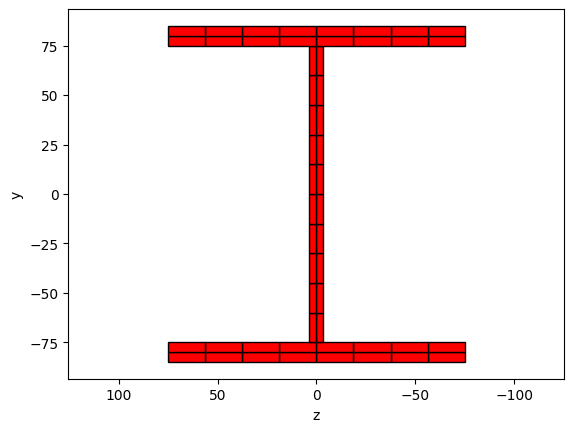

In [4]:
#HW150*150

"""
A-------------------------l                      A(-85,-75)
l                         l                      B(-75,75)
l--------C       l--------B   -----              C(-75,-3.5)
         l       l              l                D(75,3.5)
         l       l              l                E(75,-75)
         l       l                               F(85,75)
         l       l              HI    ----------->z
         l  cy   l
         l       l              l
         l       l              l
E--------l       D--------l   -----      
l           cx            l         
l-------------------------F         

l---------  WI   ---------l                 
"""

HI=150
WI=150
cx=10
cy=7

A=[-HI/2-cx,-WI/2]
B=[-HI/2,WI/2]
C=[-HI/2,-cy/2]
D=[HI/2,cy/2]
E=[HI/2,-WI/2]
F=[HI/2+cx,WI/2]

fiber_column_section=3
ops.section('Fiber', fiber_column_section, '-GJ', 1.0e6)
ops.patch('rect', IDSteel, 1, 4, A[0], A[1], B[0], B[1])
ops.patch('rect', IDSteel, 4, 1, C[0], C[1], D[0], D[1])
ops.patch('rect', IDSteel, 1, 4, E[0], E[1], F[0], F[1])

fib_sec_1 = [['section', 'Fiber', 1, '-GJ', 1.0e6],
             ['patch', 'rect', IDSteel, 2, 8, A[0], A[1], B[0], B[1]],
             ['patch', 'rect', IDSteel, 10, 2, C[0], C[1], D[0], D[1]],
             ['patch', 'rect', IDSteel, 2, 8, E[0], E[1], F[0], F[1]],
             ]

matcolor = ['r']
opsv.plot_fiber_section(fib_sec_1, matcolor=matcolor)
plt.axis('equal')
plt.show()

### 线性配筋
### ops.layer('straight', 材料编号, 钢筋数量, 钢筋面积, 起点Y坐标, 起点Z坐标, 终点Y坐标, 终点Z坐标)

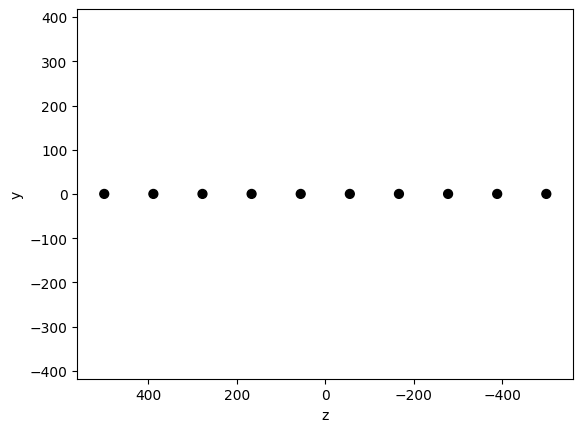

In [5]:
fiber_bar=[['section', 'Fiber', 2],
           ['layer', 'straight', IDSteel, 10, 314, 0, 500, 0, -500],]
matcolor = ['red', 'lightgrey', 'cyan', 'w', 'w', 'w']
opsv.plot_fiber_section(fiber_bar, matcolor=matcolor)
plt.axis('equal')
plt.show()

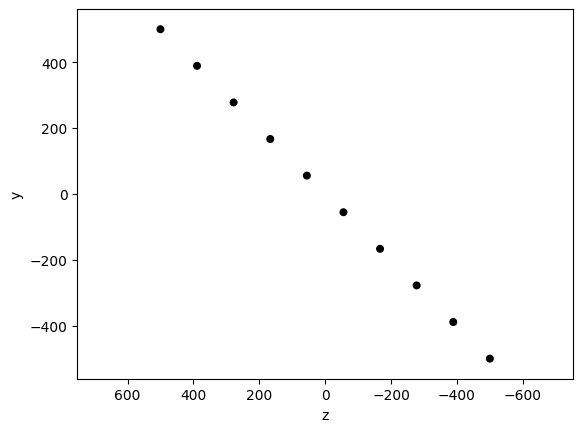

In [6]:
fiber_bar=[['section', 'Fiber', 2],
           ['layer', 'straight', IDSteel, 10, 314, -500, -500, 500, 500],]
matcolor = ['red', 'lightgrey', 'cyan', 'w', 'w', 'w']
opsv.plot_fiber_section(fiber_bar, matcolor=matcolor)
plt.axis('equal')
plt.show()

### 环形截面(圆形截面)
### ops.patch('circ', 材料编号, 旋转纤维数, 厚度纤维数, 圆心Y, 圆心Z, 起点厚度, 终点厚度, 起点旋转角, 终点旋转角)

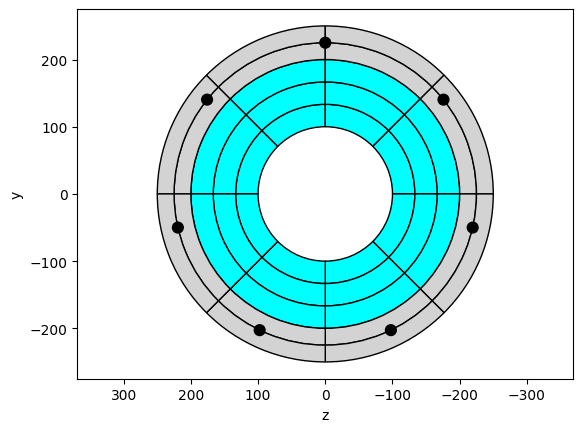

In [7]:
nc1, nr1 = 8, 3
nc2, nr2 = 8, 2
ri1, re1 = 100,200
ri2, re2 = 200,250
a_beg, a_end = 0., 360.
rbar3 = 225
a_beg2, a_end2 = 0., 360.
As_bar=3.14*8*8

fiber_column_section=4
ops.section('Fiber', fiber_column_section)
ops.patch('circ', IDCoreC, nc1, nr1, 0., 0., ri1, re1, a_beg, a_end)
ops.patch('circ', IDCoverC, nc2, nr2, 0., 0., ri2, re2, a_beg, a_end)
ops.layer('circ', IDSteel, 7, As_bar, 0., 0., rbar3, a_beg2, a_end2)

fib_sec_circular = [['section', 'Fiber', 1, '-GJ', 1.0e6],
             ['patch', 'circ', IDCoreC, nc1, nr1, 0., 0., ri1, re1, a_beg, a_end],
             ['patch', 'circ', IDCoverC, nc2, nr2, 0., 0., ri2, re2, a_beg, a_end],
             ['layer', 'circ', IDSteel, 7, As_bar, 0., 0., rbar3, a_beg2, a_end2],
             ]

matcolor = ['red', 'lightgrey', 'cyan', 'w', 'w', 'w']
opsv.plot_fiber_section(fib_sec_circular, matcolor=matcolor)
plt.axis('equal')
plt.show()

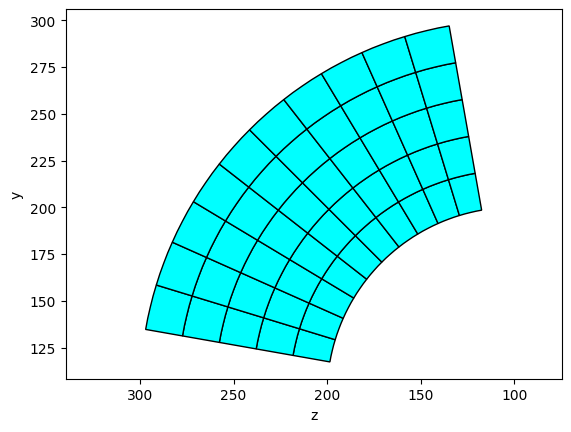

In [8]:
fib_sec_circular = [['section', 'Fiber', 1, '-GJ', 1.0e6],
             ['patch', 'circ', IDCoreC, 10, 5, 100, 100, 100, 200, 10, 80],
             ]

matcolor = ['red', 'lightgrey', 'cyan', 'w', 'w', 'w']
opsv.plot_fiber_section(fib_sec_circular, matcolor=matcolor)
plt.axis('equal')
plt.show()

### 环形配筋
### ops.layer('circ', 材料编号, 钢筋数量, 钢筋面积, 圆心Y, 圆心Z, 与圆心距离, 起点旋转角, 终点旋转角)

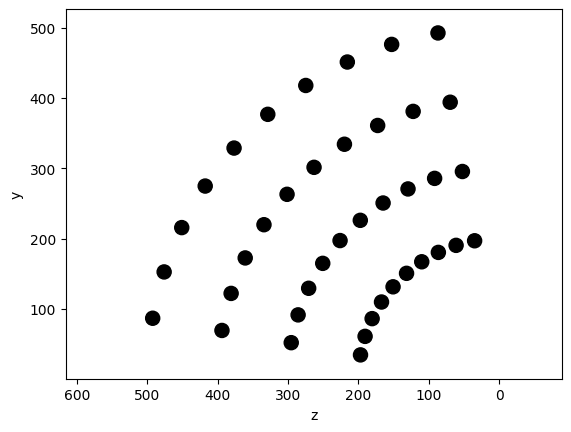

In [12]:
fib_sec_circular = [['section', 'Fiber', 1, '-GJ', 1.0e6],
             ['layer', 'circ', IDSteel, 10, 314, 0., 0., 500, 10, 80],
             ['layer', 'circ', IDSteel, 10, 314, 0., 0., 400, 10, 80],
             ['layer', 'circ', IDSteel, 10, 314, 0., 0., 300, 10, 80],
             ['layer', 'circ', IDSteel, 10, 314, 0., 0., 200, 10, 80],
             ]

matcolor = ['red', 'lightgrey', 'cyan', 'w', 'w', 'w']
opsv.plot_fiber_section(fib_sec_circular, matcolor=matcolor)
plt.axis('equal')
plt.show()

### 任意四边形截面
### ops.patch(’quad’, 材料编号, Y向纤维数, Z向纤维数, 第一点坐标(Y,Z), 第二点坐标(Y,Z), 第三点坐标(Y,Z), 第四点坐标(Y,Z))


Warning! Patch quad is non-convex or counter-clockwise defined or has at least 3 colinear points in line


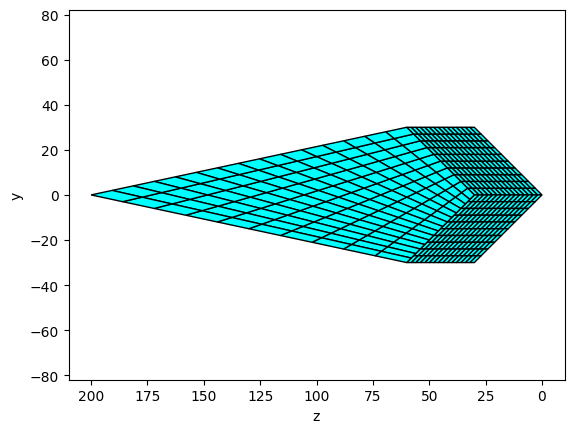

In [16]:
fib_sec_circular = [['section', 'Fiber', 1, '-GJ', 1.0e6],
             ['patch', 'quad', IDCoreC, 10, 15, 0., 0., 30, 30, 30, 60,0,30],
             ['patch', 'quad', IDCoreC, 10, 15, 0., 0., -30, 30, -30, 60,0,30],
             ['patch', 'quad', IDCoreC, 10, 15, 0., 30., 30, 60, 0, 200,-30,60],
             ]

matcolor = ['red', 'lightgrey', 'cyan', 'w', 'w', 'w']
opsv.plot_fiber_section(fib_sec_circular, matcolor=matcolor)
plt.axis('equal')
plt.show()